In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd

# Exercise 1: Calculating a Two-Sample Pooled t-Interval
- Task: Write a function that calculates a two-sample pooled t-interval for the difference in means between two independent samples with equal variances.

- Input: Two lists of sample values, confidence level.

- Output: A tuple representing the lower and upper bounds of the pooled t-interval.

- Hint: Use the pooled standard deviation formula and scipy.stats.t.ppf for the critical t-value.


A two-sample pooled t-interval is a confidence interval used to estimate the difference between the means of two independent populations. The "pooled" approach is used when we assume that the two populations have equal variances, and it combines (or "pools") the sample variances from each sample into a single, combined estimate of variance.

The two-sample pooled t-interval for the difference in means, $\mu_1 - \mu_2$ is:

$$ (\bar{X_1}-\bar{X_2}) \pm t_{\alpha/2, n_1+n_2-2} \times S_p \sqrt{\frac{1}{n_1} + \frac{1}{n_2}} $$



where $\bar{X_1}$ and $\bar{X_2}$ are the sample means, $t_{\alpha/2, n_1+n_2-2}$ is the critical t-value from the t-distribution with $n_1+n_2-2$ degrees of freedom, and $n_1$ and $n_2$ are the sample sizes.

$S_p$ is the pooled standard deviation, which is calculated as:

$$ S_p^2 = \frac{(n_1-1)S_1^2 + (n_2-1)S_2^2}{n_1+n_2-2} $$ 


In [5]:
def two_sample_pooled_t_interval(sample_1, sample_2, confidence_level):
    n_1 = len(sample_1)
    n_2 = len(sample_2)
    x_bar_1 = np.mean(sample_1)
    x_bar_2 = np.mean(sample_2)
    s_1 = np.std(sample_1, ddof=1)
    s_2 = np.std(sample_2, ddof=1)
    s_p = np.sqrt(((n_1-1)*s_1**2 + (n_2-1)*s_2**2)/(n_1+n_2-2))
    alpha = 1 - confidence_level
    t_value = stats.t.ppf(1-alpha/2, n_1+n_2-2)
    lower_bound = (x_bar_1 - x_bar_2) - t_value * s_p * np.sqrt(1/n_1 + 1/n_2)
    upper_bound = (x_bar_1 - x_bar_2) + t_value * s_p * np.sqrt(1/n_1 + 1/n_2)
    return lower_bound, upper_bound

MU_1 = 10
MU_2 = 12
SIGMA_1 = 2
SIGMA_2 = 2
N_1 = 100
N_2 = 100

sample_1 = np.random.normal(MU_1, SIGMA_1, N_1)
sample_2 = np.random.normal(MU_2, SIGMA_2, N_2)

confidence_level = 0.95
lower_bound, upper_bound = two_sample_pooled_t_interval(sample_1, sample_2, confidence_level)
print(f"95% confidence interval for the difference in means: ({lower_bound:.2f}, {upper_bound:.2f})")


95% confidence interval for the difference in means: (-2.76, -1.57)


# Exercise 2: Simulation of the Two-Sample Pooled t-Interval
- Task: Generate two independent samples from normal distributions with known means and variances, and calculate a 95% pooled t-interval for the difference in means. Repeat this for multiple simulations and track how often the interval contains the true difference.

- Input: Population means, population standard deviations, sample sizes.

- Output: Percentage of intervals containing the true difference.

- Hint: This exercise helps demonstrate the concept of confidence level.


Percentage of intervals containing the true difference: 94.30%


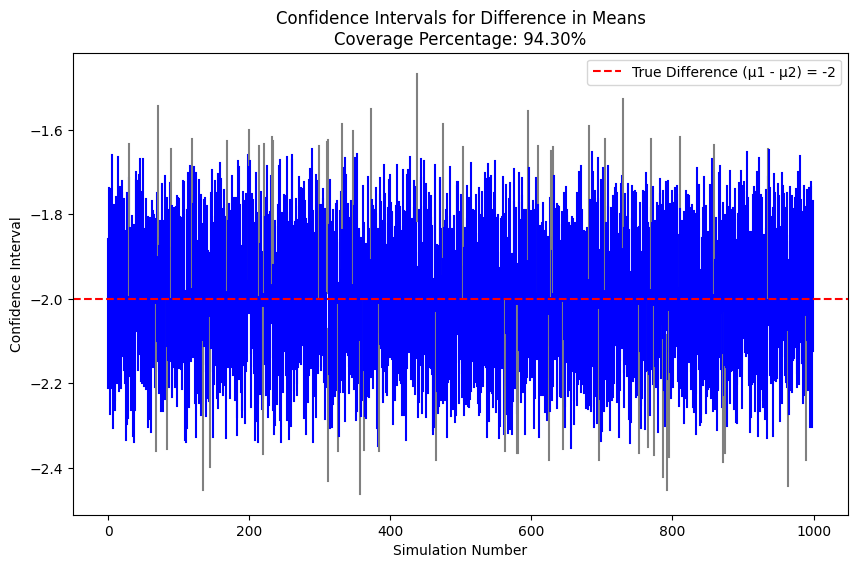

In [15]:
NUM_SIMULATIONS = 1000
MU_1 = 10
MU_2 = 12
SIGMA_1 = 2
SIGMA_2 = 2
N_1 = 1000
N_2 = 1000

num_contained = 0
intervals_list = []
true_difference = MU_1 - MU_2  # Expected difference in means


for _ in range(NUM_SIMULATIONS):
    sample_1 = np.random.normal(MU_1, SIGMA_1, N_1)
    sample_2 = np.random.normal(MU_2, SIGMA_2, N_2)
    lower_bound, upper_bound = two_sample_pooled_t_interval(sample_1, sample_2, confidence_level)
    if lower_bound <= MU_1 - MU_2 <= upper_bound:
        num_contained += 1

    intervals_list.append((lower_bound, upper_bound))

coverage_percentage = num_contained / NUM_SIMULATIONS

print(f"Percentage of intervals containing the true difference: {num_contained/NUM_SIMULATIONS:.2%}")

# Plotting
plt.figure(figsize=(10, 6))
for i, (lower, upper) in enumerate(intervals_list):
    color = 'blue' if lower <= true_difference <= upper else 'gray'
    plt.plot([i, i], [lower, upper], color=color)

# Plot the true mean difference as a red line
plt.axhline(y=true_difference, color='red', linestyle='--', label=f'True Difference (μ1 - μ2) = {true_difference}')

plt.xlabel('Simulation Number')
plt.ylabel('Confidence Interval')
plt.title(f'Confidence Intervals for Difference in Means\nCoverage Percentage: {coverage_percentage:.2%}')
plt.legend()
plt.show()


#  Exercise 3: Calculating Welch's t-Interval
- Task: Write a function that calculates Welch's t-interval for the difference in means between two independent samples with unequal variances.

- Input: Two lists of sample values, confidence level.

- Output: A tuple representing the lower and upper bounds of Welch's t-interval.

- Hint: Use Welch's t-distribution formula for the standard error and degrees of freedom.


Welch's t-interval is used when the two populations have unequal variances. The formula for Welch's t-interval is:

$$ (\bar{X_1}-\bar{X_2}) \pm t_{\alpha/2, \nu} \times \sqrt{\frac{S_1^2}{n_1} + \frac{S_2^2}{n_2}} $$

where $\nu$ is the degrees of freedom, calculated as:

$$ \nu = \frac{\left(\frac{S_1^2}{n_1} + \frac{S_2^2}{n_2}\right)^2}{\frac{S_1^4}{n_1^2(n_1-1)} + \frac{S_2^4}{n_2^2(n_2-1)}} $$

In [17]:
def calculate_welch_degrees_of_freedom(s_1, s_2, n_1, n_2):
    return ((s_1**2/n_1 + s_2**2/n_2)**2) / ((s_1**4/(n_1**2*(n_1-1))) + (s_2**4/(n_2**2*(n_2-1))))

def two_sample_welch_t_interval(sample_1, sample_2, confidence_level):
    n_1 = len(sample_1)
    n_2 = len(sample_2)
    x_bar_1 = np.mean(sample_1)
    x_bar_2 = np.mean(sample_2)
    s_1 = np.std(sample_1, ddof=1)
    s_2 = np.std(sample_2, ddof=1)
    nu = calculate_welch_degrees_of_freedom(s_1, s_2, n_1, n_2)
    alpha = 1 - confidence_level
    t_value = stats.t.ppf(1-alpha/2, nu)
    lower_bound = (x_bar_1 - x_bar_2) - t_value * np.sqrt(s_1**2/n_1 + s_2**2/n_2)
    upper_bound = (x_bar_1 - x_bar_2) + t_value * np.sqrt(s_1**2/n_1 + s_2**2/n_2)
    return lower_bound, upper_bound

# Test the Welch's t-interval function with sample data

# Generate two samples with different means and variances
sample1 = np.random.normal(loc=10, scale=2, size=100)  # Mean=10, SD=2
sample2 = np.random.normal(loc=8, scale=3, size=400)   # Mean=8, SD=3

# Calculate 95% confidence interval
confidence_level = 0.95
lower, upper = two_sample_welch_t_interval(sample1, sample2, confidence_level)

print(f"Sample 1 mean: {np.mean(sample1):.2f}")
print(f"Sample 2 mean: {np.mean(sample2):.2f}")
print(f"True difference in means: {np.mean(sample1) - np.mean(sample2):.2f}")
print(f"\n{confidence_level*100}% Welch's t-interval:")
print(f"Lower bound: {lower:.2f}")
print(f"Upper bound: {upper:.2f}")
print(f"Interval width: {upper - lower:.2f}")


Sample 1 mean: 9.69
Sample 2 mean: 8.17
True difference in means: 1.52

95.0% Welch's t-interval:
Lower bound: 1.04
Upper bound: 1.99
Interval width: 0.96


# Exercise 4: Comparing Two-Sample Pooled t-Interval and Welch's t-Interval
- Task: Simulate data for two independent samples with unequal variances and calculate both the pooled t-interval and Welch's t-interval. Compare the interval widths and interpret the difference.

- Input: Two lists of sample values, confidence level.

- Output: The bounds of both intervals and a discussion on the difference in widths.

- Hint: The Welch’s interval should be wider when variances are unequal.


In [20]:
MU_1 = 10
MU_2 = 12
SIGMA_1 = 2
SIGMA_2 = 9
N_1 = 100
N_2 = 100
CONFIDENCE_LEVEL = 0.95

sample_1 = np.random.normal(MU_1, SIGMA_1, N_1)
sample_2 = np.random.normal(MU_2, SIGMA_2, N_2)

lower_bound_pooled, upper_bound_pooled = two_sample_pooled_t_interval(sample_1, sample_2, CONFIDENCE_LEVEL)
lower_bound_welch, upper_bound_welch = two_sample_welch_t_interval(sample_1, sample_2, CONFIDENCE_LEVEL)

print(f"Pooled t-interval length: {upper_bound_pooled - lower_bound_pooled:.2f}")
print(f"Welch's t-interval length: {upper_bound_welch - lower_bound_welch:.2f}")

Pooled t-interval length: 3.75
Welch's t-interval length: 3.77


# Exercise 6: Calculating a Paired t-Interval
- Task: Write a function that calculates a paired t-interval for the mean difference between two related samples (e.g., before and after measurements).

- Input: Two lists of paired sample values, confidence level.

- Output: A tuple representing the lower and upper bounds of the paired t-interval.

- Hint: First calculate the differences between paired values, then proceed with a one-sample t-interval on the differences.

A paired t-interval is a confidence interval used to estimate the mean difference between two related or paired samples. This method is typically used in situations where observations are matched in some way, such as before-and-after measurements on the same subjects, measurements on the same individuals under different conditions, or matched pairs in a study.

Given 
- $d_i = X_{1i} - X_{2i}$ for $i = 1, 2, ..., n$ where $X_{1i}$ and $X_{2i}$ are the paired measurements,

- $\bar{d} = \frac{1}{n}\sum_{i=1}^{n} d_i$ is the sample mean of the differences,

- $ S_d = \sqrt{\frac{1}{n-1}\sum_{i=1}^{n} (d_i - \bar{d})^2} $ is the sample standard deviation of the differences,

- n is the number of pairs

The confidence interval for the mean difference $\mu_d$ is given by:

$$ \bar{d} \pm t_{\alpha/2, n-1} \times \frac{S_d}{\sqrt{n}} $$

where $t_{\alpha/2, n-1}$ is the critical t-value from the t-distribution with $n-1$ degrees of freedom.

In [22]:
def paired_t_interval(sample_1, sample_2, confidence_level):
    d = np.array(sample_1) - np.array(sample_2)
    d_bar = np.mean(d)
    s_d = np.std(d, ddof=1)
    n = len(d)
    alpha = 1 - confidence_level
    t_value = stats.t.ppf(1-alpha/2, df=n-1)
    margin_of_error = t_value * s_d / np.sqrt(n)

    lower_bound = d_bar - margin_of_error
    upper_bound = d_bar + margin_of_error
    return lower_bound, upper_bound


# Simulate before and after measurements with a known mean difference
n = 30  # Sample size
true_difference = 2.5
correlation = 0.7  # Correlation between paired measurements

# Generate correlated data
mean = [10, 10 + true_difference]  # Means for before and after
cov = [[4, 4*correlation], [4*correlation, 4]]  # Covariance matrix
data = np.random.multivariate_normal(mean, cov, n)
before = data[:, 0]
after = data[:, 1]

# Calculate paired t-interval
confidence_level = 0.95
lower, upper = paired_t_interval(before, after, confidence_level)

# Output results
print(f"True difference: {true_difference}")
print(f"Sample mean difference: {np.mean(before - after):.2f}")
print(f"95% Confidence Interval: ({lower:.2f}, {upper:.2f})")
print(f"Interval width: {upper - lower:.2f}")


True difference: 2.5
Sample mean difference: -2.31
95% Confidence Interval: (-2.97, -1.65)
Interval width: 1.32


# Exercise 7: Simulating the Effect of Unequal Variances on Welch's t-Interval
- Task: Generate two independent samples from normal distributions with different variances and calculate Welch's t-interval for the difference in means. Repeat for multiple pairs of variances (e.g., variance ratio 1:1, 1:2, 1:5) and observe the effect on interval width.

- Input: Mean and variance for both populations, variance ratios, confidence level.

- Output: A plot showing interval width as a function of variance ratio.

- Hint: This exercise shows how increasing variance differences affect Welch’s interval.

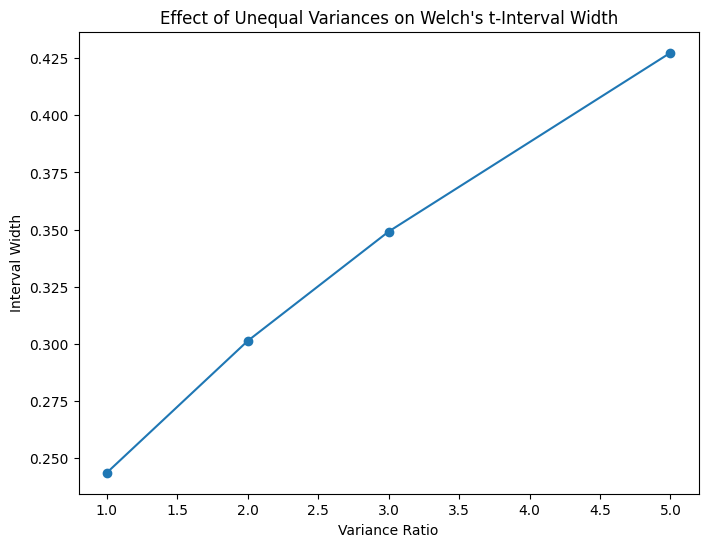

In [23]:
MU_1, MU_2 = 10, 12
N = 1000
CONFIDENCE_LEVEL = 0.95
VARIANCE_RATIOS = [1, 2, 3, 5]
BASE_VARIANCE = 2 # base variance for population 1 

interval_widths = []
for ratio in VARIANCE_RATIOS:
    var_1 = BASE_VARIANCE
    var_2 = BASE_VARIANCE * ratio
    sample_1 = np.random.normal(MU_1, np.sqrt(var_1), N)
    sample_2 = np.random.normal(MU_2, np.sqrt(var_2), N)
    lower, upper = two_sample_welch_t_interval(sample_1, sample_2, CONFIDENCE_LEVEL)
    interval_widths.append(upper - lower)

plt.figure(figsize=(8, 6))

plt.plot(VARIANCE_RATIOS, interval_widths, marker='o')
plt.xlabel('Variance Ratio')
plt.ylabel('Interval Width')
plt.title('Effect of Unequal Variances on Welch\'s t-Interval Width')
plt.show()

The plot illustrates how the interval width of Welch's t-interval increases as the variance ratio between the two populations grows. As the variance difference between the populations becomes larger, the confidence interval widens, reflecting greater uncertainty in estimating the difference in means when variances are unequal.